# Importando o que importa (haha)

In [112]:
from freeSpace import *
from collections import defaultdict
import numpy as np
import math
import pandas as pd
from geopy.distance import vincenty
#from geopy.distance import great_circle
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Pegando os Valores de Treinamento

In [83]:
#Erbs
csvErbs = pd.read_csv("erbs.csv")
erbsLidas = csvErbs[['lat','lon']].values
erbs_posicao = dict()
for i in range (1,len(erbsLidas)+1):
    erbs_posicao[i] = (erbsLidas[i-1])

#Medicoes, dados de treinamento
csvMed = pd.read_csv("medicoes.csv")
medidas_posicao = csvMed[['lat','lon']].values # Valores em Tupla
medidas_potencia = csvMed[["RSSI_1","RSSI_2","RSSI_3","RSSI_4","RSSI_5","RSSI_6"]].values




In [84]:
#np.shape(medidas_potencia)
type(medidas_potencia[0])

numpy.ndarray

# Gera Modelo 

In [85]:
#medidas_potencia.values
medidas_posicao_lat = csvMed['lat'].values
medidas_posicao_lon = csvMed['lon'].values

#modela latitude e longitude separadamente
neigh_lat = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
neigh_lat.fit(medidas_potencia,medidas_posicao_lat )

neigh_lon = KNeighborsRegressor(n_neighbors=5, weights = 'distance')
neigh_lon.fit(medidas_potencia,medidas_posicao_lon )

#neigh_lat.predict([-66.825000,-35.600000,-64.875000,-72.575000,-79.525000,-78.450000])
#neigh_lon.predict([-66.825000,-35.600000,-64.875000,-72.575000,-79.525000,-78.450000])
#print(neigh_lat.predict([-67.3, -24.7, -73.4, -67.2, -79.26666666, -80.6]))
#print(neigh_lon.predict([-67.3, -24.7, -73.4, -67.2, -79.26666666, -80.6]))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

# Pega os Valores de Teste

In [86]:

csvMedTest = pd.read_csv("testLoc.csv")
medidas_posicao_teste = csvMedTest[['lat','lon']].values # Valores em Tupla
medidas_potencia_teste = csvMedTest[["RSSI_1","RSSI_2","RSSI_3","RSSI_4","RSSI_5","RSSI_6"]].values    


In [87]:
np.shape(medidas_posicao_teste)

(200, 2)

# Faz a Predição

In [88]:
predicao_lat = neigh_lat.predict(medidas_potencia_teste)
predicao_lon = neigh_lon.predict(medidas_potencia_teste)

# Calcula o Erro

In [89]:
vet_err_lat = []
vet_err_lon = []
for i in range(0,200):
    vet_err_lat.append(predicao_lat[i] - medidas_posicao_teste[i][0])
    vet_err_lon.append(predicao_lon[i] - medidas_posicao_teste[i][1])

err_geral = []
for i in range(len(predicao_lat)):
    err_geral.append(vincenty((predicao_lat[i],predicao_lon[i]), (medidas_posicao_teste[i][0], medidas_posicao_teste[i][1])).kilometers)



In [110]:
print("MEDIA LAT = " + str(np.mean(vet_err_lat)))
print("MEDIA LON = " + str(np.mean(vet_err_lon)))
print("MEDIA KM = " + str(np.mean(err_geral)))


MEDIA LAT = -0.000129606151084
MEDIA LON = 0.000734426809705
MEDIA KM = 0.144464140931


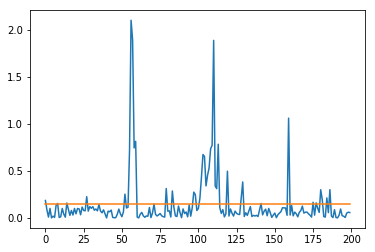

In [97]:
plt.plot(range(200),err_geral, range(200),[np.mean(err_geral)for i in range(200)])
plt.show()

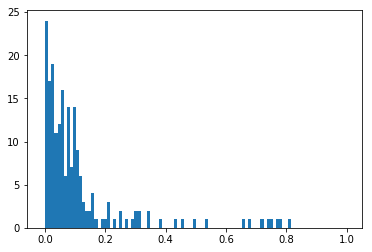

In [109]:
plt.clf()
bins = np.linspace(-0.01, 1, 100)
plt.hist(err_geral,bins)
plt.show()